# Prediccion de la diabetes (Solucion con Bosques Aleatorios)

### Paso 1: Carga del conjunto de datos

Cargamos la data y visualizamos

In [106]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [107]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Paso 2: Realiza un EDA completo


Para ello, veamos cuanta informacion tiene nuestro DataFrame

In [108]:
# Obtener dimensiones
total_data.shape

(768, 9)

In [109]:
# Obtain information about data types and non-null values
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [110]:
total_data.isnull().sum().sort_values(ascending = False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Lo anterior revela que el DataFrame contiene 768 registros (numero total de filas) y 9 variables observadas (numero total de columnas), de las cuales sabemos que:

+ Todas las variables son del tipo numerico.

+ la variables Outcome es del tipo categorico cuyos valores que puede tomar es de 0,1; siendo 0 negativo en la presencia de la diabetes y 1 es positivo en la presencia de diabetes.

Adicionalmente no existen valores faltantes en la data.


#### Analisis de estadisticos univariados

Para ellos estudiaremos laas variables

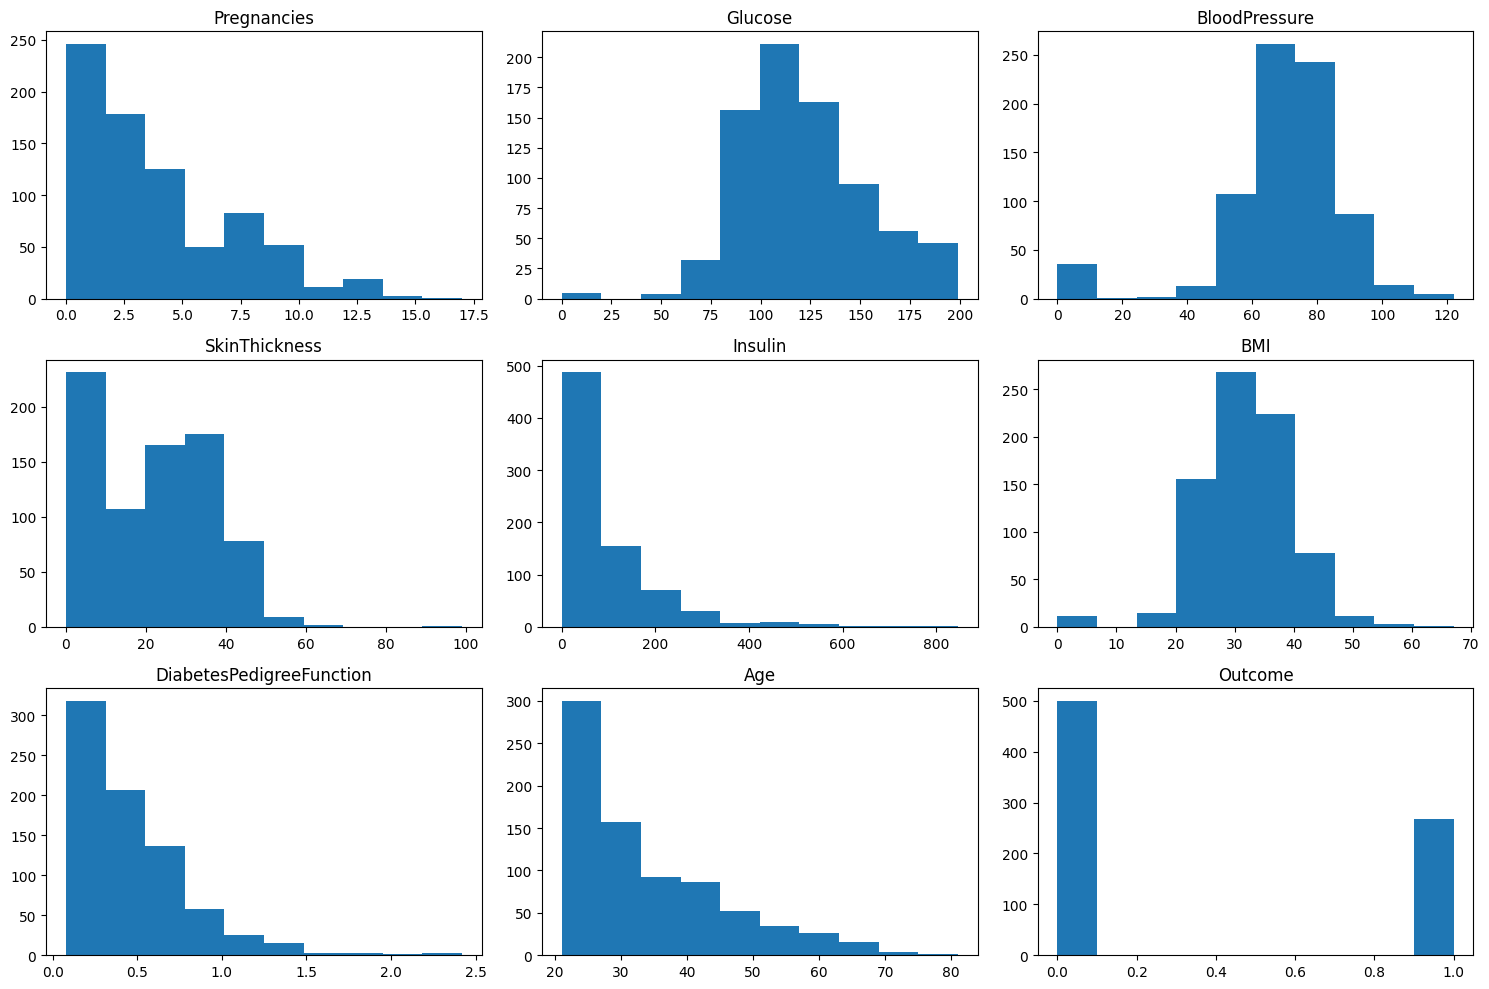

In [111]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns   

# Obtener las columnas numericas **antes** de llamar a la funcion
numeric_cols = total_data.select_dtypes(include=['number']).columns 

def plot_histograms(data, cols, rows, figsize=(15, 10)):
    """
    Crea una cuadricula de histogramas para las columnas numericas de un DataFrame.

    Args:
        data: DataFrame con los datos.
        cols: Numero de columnas en la cuadricula.
        rows: Numero de filas en la cuadricula.
        figsize: Tamaño de la figura.
    """

    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    for i, col in enumerate(numeric_cols):
        plt.subplot(rows, cols, i+1)
        plt.hist(data[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

# Crear una cuadrícula de 3x3
plot_histograms(total_data, cols=3, rows=3)

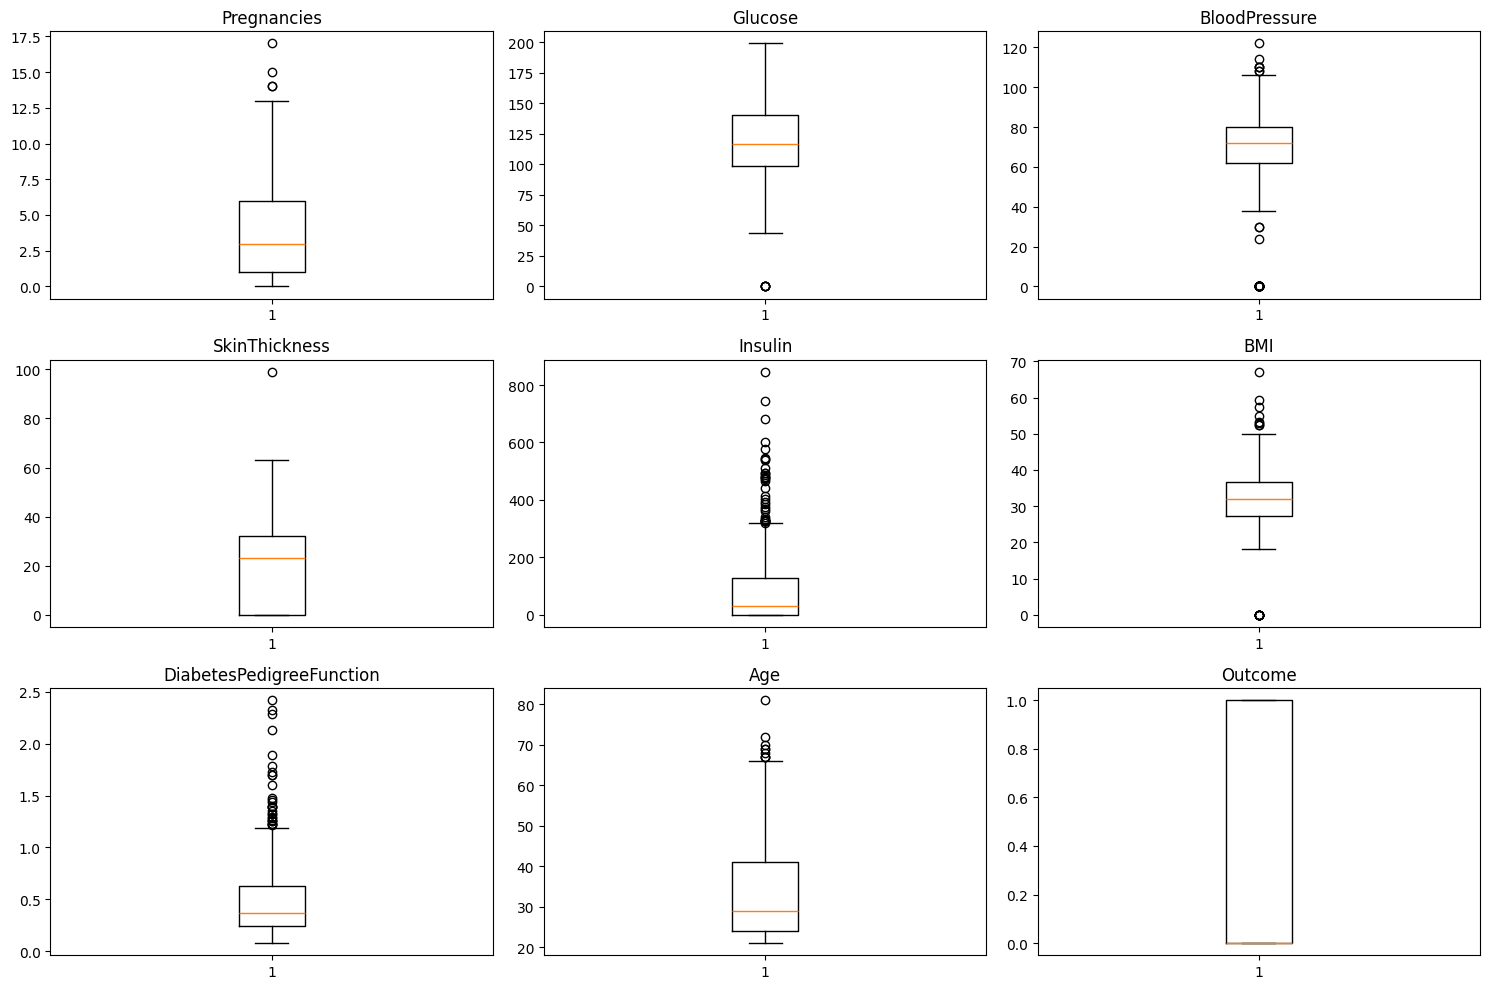

In [112]:
# Obtener las columnas numericas **antes** de llamar a la funcion
# numeric_cols = total_data.select_dtypes(include=['number']).columns 

def plot_boxplots(data, cols, rows, figsize=(15, 10)):
    """
    Crea una cuadricula de diagramas de caja para las columnas numericas de un DataFrame.

    Args:
        data: DataFrame con los datos.
        cols: Numero de columnas en la cuadricula.
        rows: Numero de filas en la cuadricula.
        figsize: Tamaño de la figura.
    """

    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    for i, col in enumerate(numeric_cols):
        plt.subplot(rows, cols, i+1)
        plt.boxplot(data[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

# Crear una cuadrícula de 3x3
plot_boxplots(total_data, cols=3, rows=3)

De los graficos anteriores podemos indicar que:


+ Variable `Pregnancies`: la distribucion del numero de embarazos de los pacientes posee asimetria a la derecha y presencia de valores extremos.

+ Variable `Glucose`: la distribucion de la concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa posee un comportamiento simetrico y no posee valores extremos.

+ Variable `BloodPressure`: la diostribucion de la presión arterial diastólica (medida en mm Hg) posee un comportamiento simetrico y posee valores extremos.

+ Variable `SkinThickness`: la distribucion del grosor del pliegue cutáneo del tríceps posee un comportamiento asimetrico a la derecha y posee valores extremos.

+ Variable `Insulin`: la distribucion de la insulina sérica de 2 horas posee un comportamiento asimetrico a la derecha y posee valores extremos.

+ Variable `BMI`: la distribucion del Indice de masa corporal posee un comportamiento simetrico y posee valores extremos.

+ Variable `DiabetesPedigreeFunction`: la distribucion de la función de pedigrí de diabetes posee asimetria a la derecha y presencia de valores extremos.

+ Variable `Age`: la distribucion de las edades de los pacientes posee asimetria a la derecha y presencia de valores extremos.

+ Variable `Outcome`: la variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo por ser de conteo revela que la poblacion de estudio posee una poblacion sana de diabetes superior a la poblacion que sufre de diabeles.


#### Procedamos a realizar las estadisticas multivariantes

Primero veamos como se interrelacionan las variables entre si

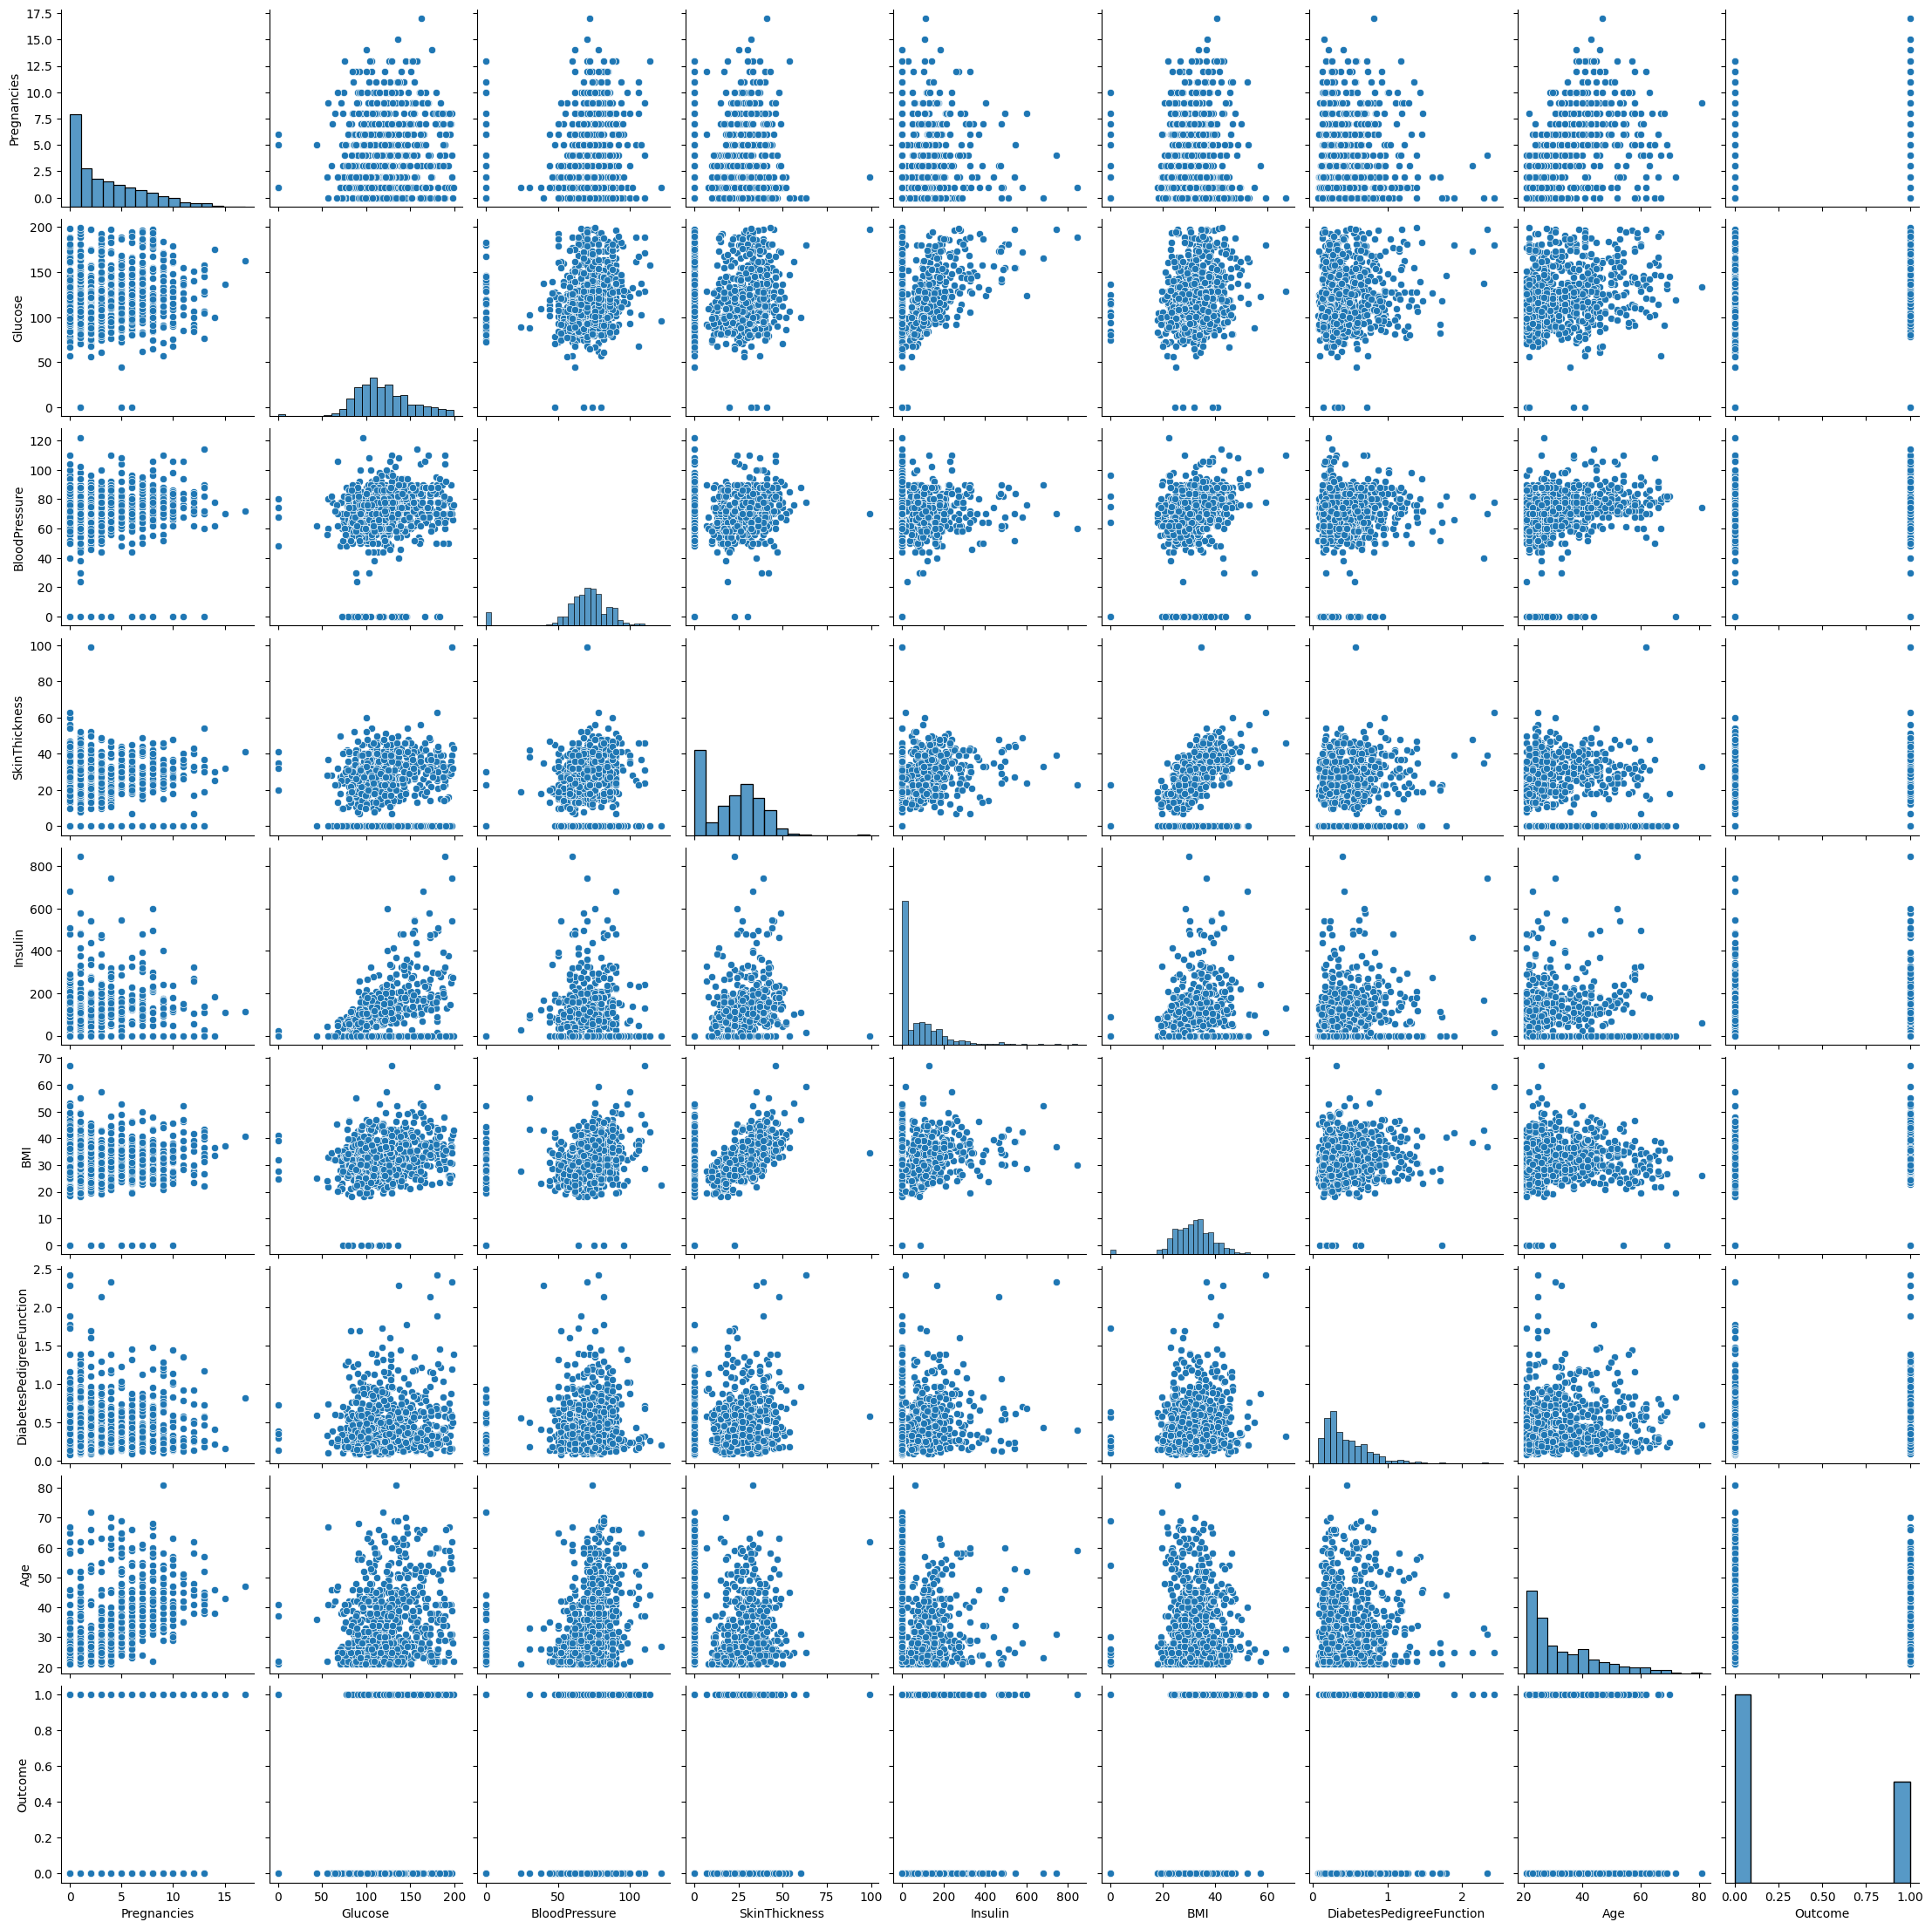

In [113]:
sns.pairplot(data = total_data)

Lo anterior indica que aparente las variables no tiene una relacion lineal entre si, corroboremos esto observado su correlacion.

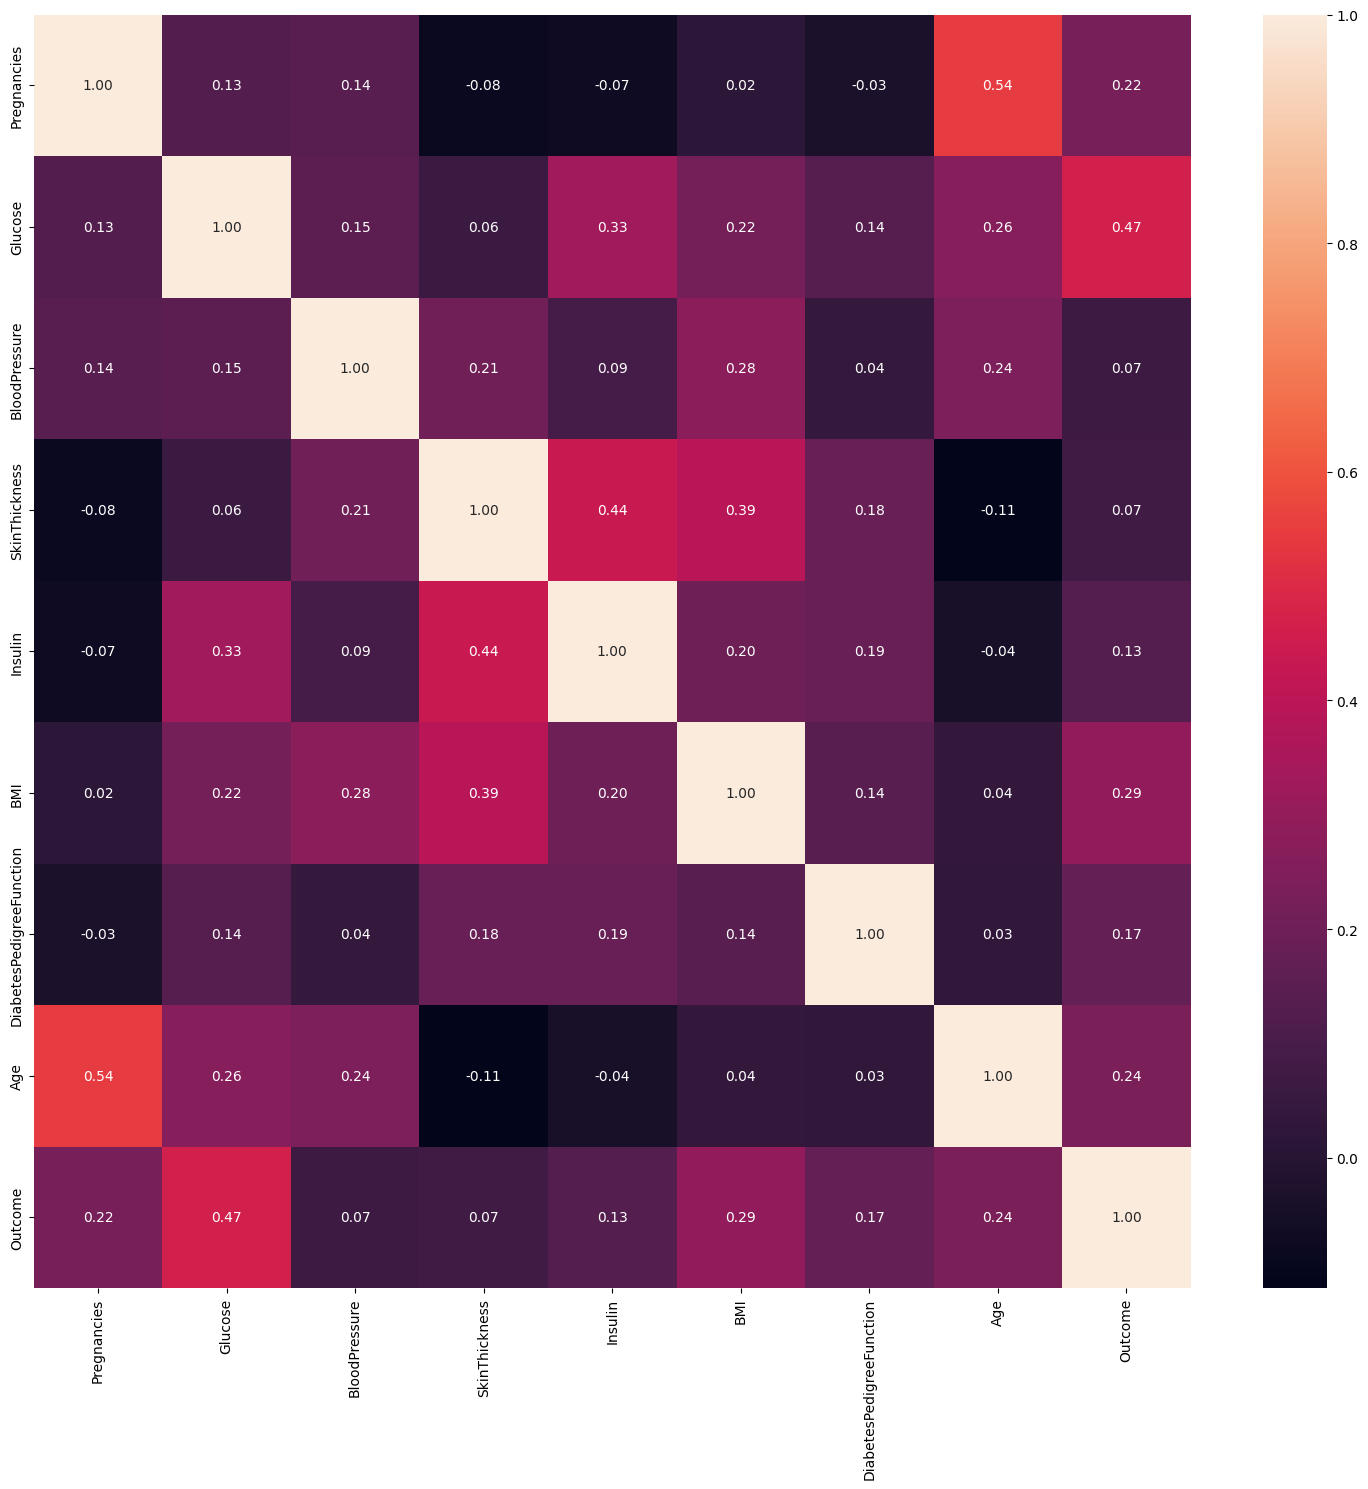

In [114]:
fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(total_data.corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()

Luego de observada la correlacion se puede decir que, las variables con mayor relacion moderada (<60%) en el mismo sentido son, en primera estancia las variable edad con numero de embarazos, la cual posee un 54% (0,54) seguida y la glucosa con la variable de estado de la diabetes, la cual tiene un 47% (0,47).

#### Ingenieria de caracteristicas

Veamos el resumen estadistico de las variables


In [115]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Lo anterior revela la presencia de datos extremos en las variables referidas, sin embargo se ha decidido trabajar con ellos, procedamos a escalar con la medida del maximo y minino para preservar el comportamiento distrbucional, aunque para un modelo de clasificacion no es necesario.


#### Seleccion de caracteristicas

Dado que queremos predecir la diabeltes la variable `Outcome` es nuestra variable que consideraremos que es influenciada por las demas, y procedemos a seleccionar la data de entrenamiento y la data de prueba.

In [116]:
# Selección de características

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

X = total_data.drop("Outcome", axis = 1)
y = total_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(k = 7)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,84.0,0.0,0.0,0.0,0.304,21.0
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0


In [117]:
X_test_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,98.0,58.0,190.0,34.0,0.430,43.0
1,2.0,112.0,75.0,0.0,35.7,0.148,21.0
2,2.0,108.0,64.0,0.0,30.8,0.158,21.0
3,8.0,107.0,80.0,0.0,24.6,0.856,34.0
4,7.0,136.0,90.0,0.0,29.9,0.210,50.0


In [118]:
X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

### Paso 3: Construye un modelo de random forest

Para ello cargamos los datos

In [119]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,84.0,0.0,0.0,0.0,0.304,21.0,0
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0,1
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0,0
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0,0
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0,1


In [120]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]



#### Procedamos a la inicializacion y entrenamiento del modelo

In [121]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Una vez que el modelo se ha entrenado correctamente, podemos visualizar el bosque aleatorio con la misma biblioteca. Esta visualización mostrará cada árbol derivado completo:

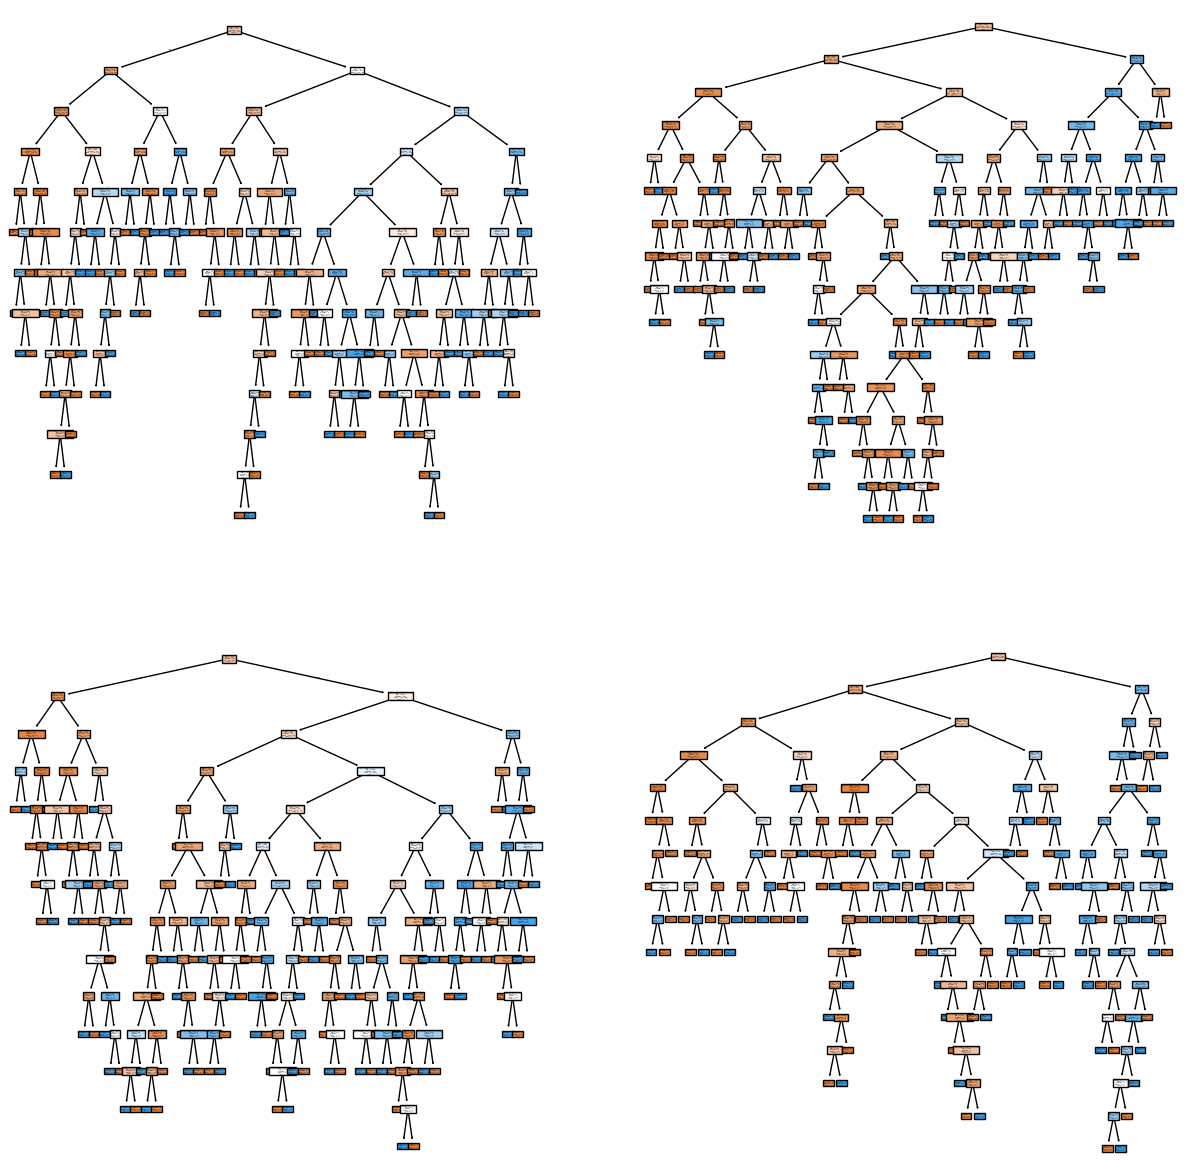

In [122]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# Mostramos los 4 primeros arboles de los 100 generados (por defecto)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()


#### Procedamos ahora al proceso de prediccion del modelo

Una vez se ha entrenado el modelo, se puede utilizar para predecir con el conjunto de datos de prueba.


In [123]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

Con los datos en crudo es muy complicado saber si el modelo está acertando o no. Para ello, debemos compararlo con la realidad. Existe una gran cantidad de métricas para medir la efectividad de un modelo a la hora de predecir, entre ellas la precisión (accuracy), que es la fracción de predicciones que el modelo realizó correctamente.

In [124]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7467532467532467

Este resultado indica que, el modelo fue capaz de reproducir alrededor del 75% de la data de prueba.


### Paso 4: Optimizacion del modelo

Realicemos esto mediante el metodo de La búsqueda en cuadrícula (grid search), los hiperparametros a considerar seran para este caso:

+ El numero de estimadores.
+ La profundidad o niveles de ramificacion del arbol
+ Division minima de las muestras.
+ Muestras minimas a tomar.
+ Seleccion de muestra bootstrap.


In [125]:
from sklearn.ensemble import RandomForestClassifier  # O RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 


# Define los parámetros a ajustar
param_grid = {
    'n_estimators': [1,20,40,60,80,100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Realiza la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator= model, param_grid=param_grid, cv=5)
grid_search



GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [1, 20, 40, 60, 80, 100, 200, 300]})

Ahora observemos cuales serian los mejores valores para los hiperametros 

In [126]:
grid_search.fit(X_train, y_train)

# Imprime los mejores parámetros
print(f"Lo mejores hiperparametros son: {grid_search.best_params_}")



Lo mejores hiperparametros son: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 40}


Usemos la data de entrenamiento para ajustar el modelo con los mejores hiperparametros.

In [134]:
# Crea un modelo con los mejores parámetros
best_model = RandomForestClassifier(**grid_search.best_params_)
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=40)

Una vez ajustado realicemos las predicciones pertinenes y luego comparemos predicciones con data de prueba

In [135]:
y_pred = best_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

Usemos la precisión (accuracy), que es la fracción de predicciones que el modelo realizó correctamente para evaluar la efectividad del modelo con los mejores parametros

In [136]:
accuracy_score(y_test, y_pred)

0.7727272727272727

Respecto al modelo original podemos observar una mejora en el modelo de alrededor de 2%, lo cual es un bueno.

Procederemos a guardar la data del modelo optimizado

In [137]:
from pickle import dump

dump(best_model, open("../models/ranfor_classifier_nestimators-60_42.sav", "wb"))